### Student Information
Name: 徐婉蓁

Student ID:110306071

GitHub ID:#132556666

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# **1:**

In [4]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [25]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train= fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

In [27]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### **>>> Exercise 2 (take home):** 

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

### >>>Answer

In [97]:
X.info()
print(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category       2257 non-null   int64 
 2   category_name  2257 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.0+ KB
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [44]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [46]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### >>>Answer

isnull() does not recognize string representations of missing values like 'NaN' and 'None' as actual nulls. These are treated as regular string values, so they won’t be flagged as missing by isnull().

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### >>>Answer

The X_sample DataFrame is a random subset of X with 1000 rows selected from the original. The data is not in order in X_sample.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [93]:
X_sample = X.sample(n=1000) #random state

### >>>Answer

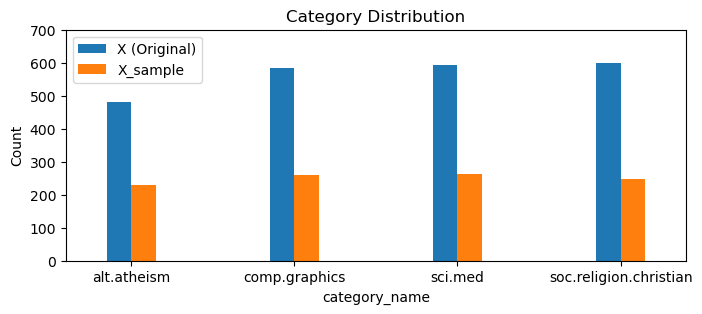

In [120]:
X_counts = X.category_name.value_counts()
X_sample_counts = X_sample.category_name.value_counts()

# Align the indices (categories) to ensure all categories are plotted
#ategories = sorted(set(X_counts.index).union(set(X_sample_counts.index)))
#X_counts = X_counts.reindex(categories, fill_value=0)
#X_sample_counts = X_sample_counts.reindex(categories, fill_value=0)

# Create a DataFrame to hold both value counts for easier plotting
counts_df = pd.DataFrame({'X': X_counts, 'X_sample': X_sample_counts})

# Plotting side-by-side bars
counts_df.plot(kind='bar', width=0.3, figsize=(8, 3))
plt.title("Category Distribution")
plt.ylim([0,700])  # Adjust as needed based on your data range
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["X (Original)", "X_sample"])

# Display the plot
plt.show()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.


In [126]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/hanna.ashley/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [134]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [142]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()
#Out of the first 100 words, the first five data array has or no

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### >>>Answer

In [146]:
count_vect.get_feature_names_out()[1:2]

array(['000'], dtype=object)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### >>>Answer

Instead of visualizing the entire matrix, I will use a representative subset of terms and documents, as a full matrix might be overwhelming and hard to interpret

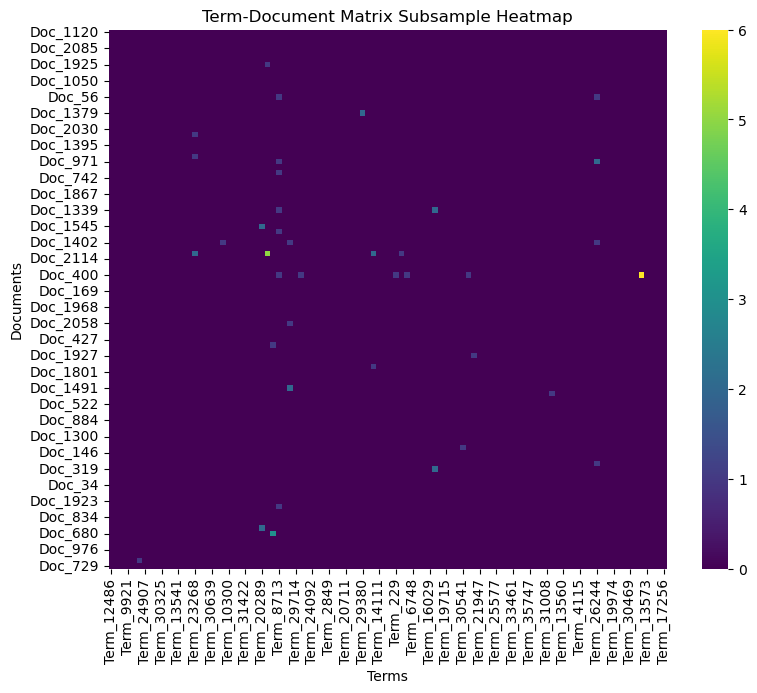

In [167]:
import seaborn as sns

# Randomly select indices for documents and terms
selected_docs = np.random.choice(X_counts.shape[0], 100, replace=False)
selected_terms = np.random.choice(X_counts.shape[1], 100, replace=False)

# Subset the matrix (assumes X_counts is a sparse matrix format like CSR)
plot_z = X_counts[selected_docs][:,selected_terms].toarray()

# Create DataFrame for the heatmap
plot_x = [f"Term_{i}" for i in selected_terms]  # Replace with actual term names if available
plot_y = [f"Doc_{i}" for i in selected_docs]    # Replace with document identifiers if needed
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot the heatmap
plt.subplots(figsize=(9, 7))  # Increase size for better readability
ax = sns.heatmap(df_todraw, cmap="viridis", vmin=0, vmax=plot_z.max(), annot=False)

plt.title("Term-Document Matrix Subsample Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()


### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

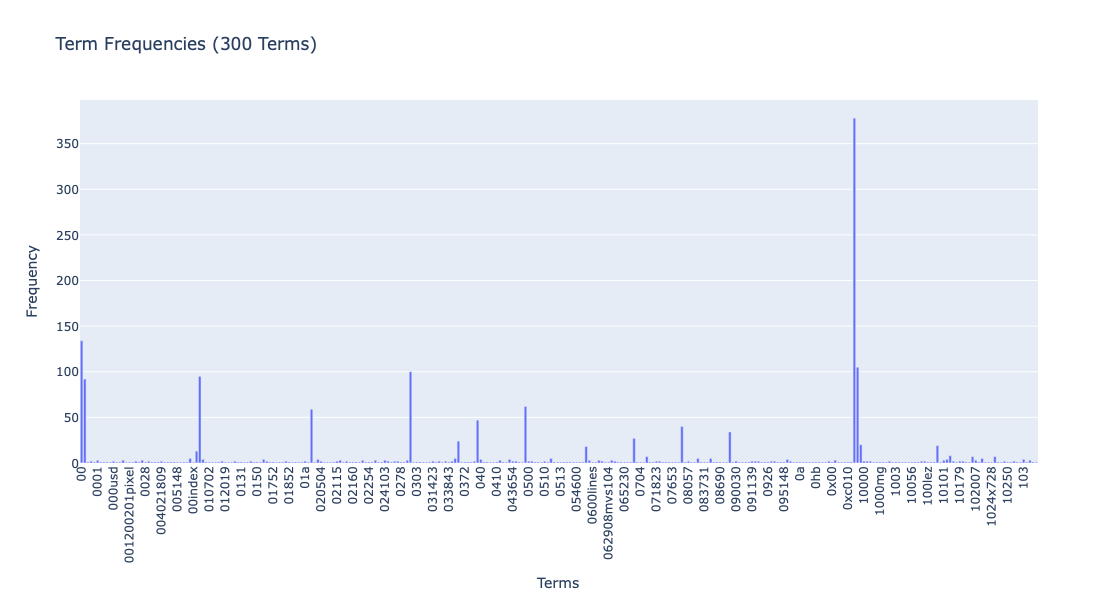

In [224]:
import plotly.express as px

# Calculate term frequencies efficiently
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# First 300 terms and frequencies for plotting
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Using Plotly for an interactive bar chart
fig = px.bar(
    x=terms,
    y=frequencies,
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Term Frequencies (300 Terms)"
)
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)
fig.show()


### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

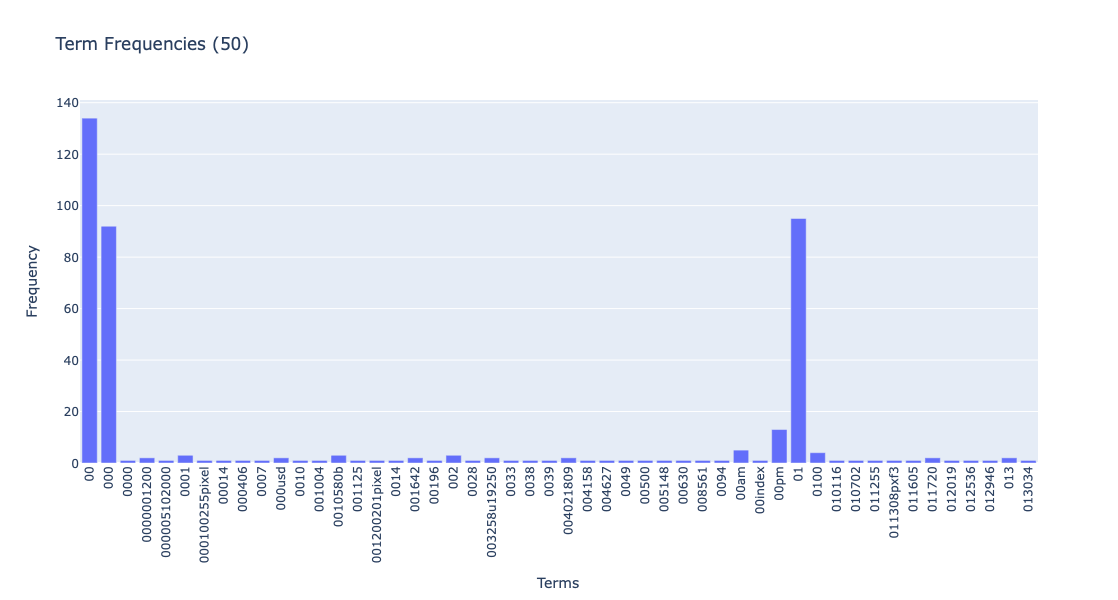

In [226]:

# Calculate term frequencies efficiently
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# First 300 terms and frequencies for plotting
terms = count_vect.get_feature_names_out()[:50]
frequencies = term_frequencies[:50]

# Using Plotly for an interactive bar chart
fig = px.bar(
    x=terms,
    y=frequencies,
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Term Frequencies (50)"
)
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)
fig.show()


### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).

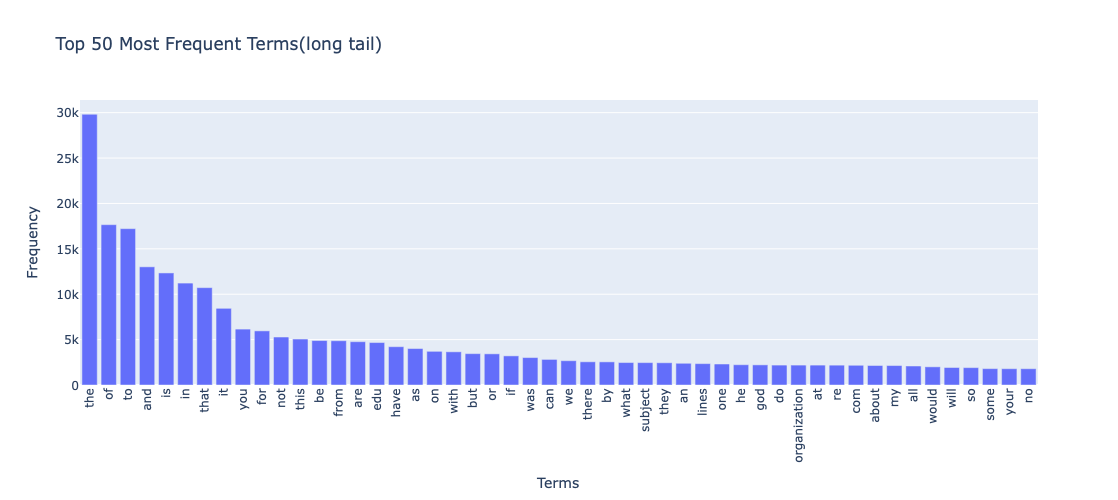

In [206]:
# Define the number of terms to visualize
top_n = 50  # Adjust as needed to balance performance and clarity

# Get indices of top N terms by frequency
top_indices = np.argsort(term_frequencies)[-top_n:][::-1]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_frequencies = term_frequencies[top_indices]

# Plot with Plotly
fig = px.bar(
    x=top_terms,
    y=top_frequencies,
    labels={'x': 'Terms', 'y': 'Frequency'},
    title=f"Top {top_n} Most Frequent Terms(long tail)"
)
fig.update_layout(xaxis_tickangle=-90, width=900, height=500)
fig.show()


### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

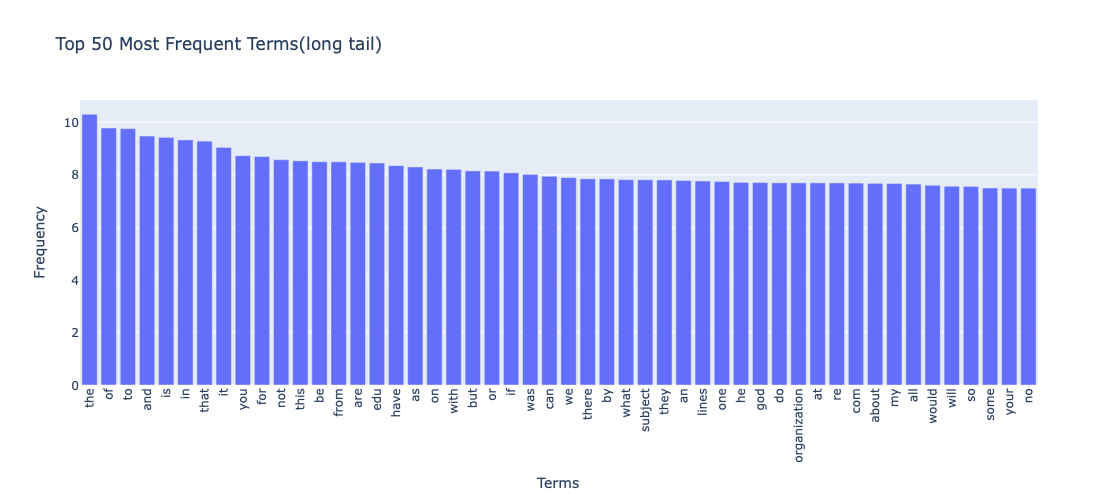

In [237]:
import math
term_frequencies_log =  np.array([math.log(i) for i in term_frequencies])


top_n = 50  # Adjust as needed to balance performance and clarity

# Get indices of top N terms by frequency
top_indices = np.argsort(term_frequencies_log)[-top_n:][::-1]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_frequencies =term_frequencies_log [top_indices]

# Plot with Plotly
fig = px.bar(
    x=top_terms,
    y=top_frequencies,
    labels={'x': 'Terms', 'y': 'Frequency'},
    title=f"Top {top_n} Most Frequent Terms(long tail)"
)
fig.update_layout(xaxis_tickangle=-90, width=900, height=500)
fig.show()

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

### >>> **Answer:** 

For the top 5.0% words, all categories are almost the same in the top 5 words. 
As for the bottom 1% words, all categories has totally different words.

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [259]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [304]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

#for category in categories:
   #print(f'\nFor category {category} we filter the following words:')
    #term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

In [306]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


In [308]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


In [309]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.08925294876098633


### >>> **Answer:** 

In [313]:
from PAMI.frequentPattern.topk import FAE as alg
#500
kcount=500
seperator='\t'
obj1 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=kcount, sep=seperator)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
#1000
kcount=1000
seperator='\t'
obj1 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=kcount, sep=seperator)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
#1500
kcount=1500
seperator='\t'
obj1 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=kcount, sep=seperator)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime


 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.9030251502990723
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 1.9157030582427979
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 4.306774854660034


In [298]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'td_freq_db_comp_graphics.csv'
seperator='\t'
minimumSupportCountList = [3,6,9]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
print(result)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns    runtime    memory
0  MaxFPGrowth       3      6872  14.445765  47071232
1  MaxFPGrowth       6      1340   0.187641  69582848
2  MaxFPGrowth       9       660   0.083605  83755008


**Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.**

**Efficiency of FPGrowth:** Fastest overall with the highest pattern count, indicating strong performance for frequent pattern mining at higher support levels.

**Controlled Pattern Count in FAE Top-K:** Provides flexibility with k, useful when only a specific number of patterns are needed, though runtime increases with k.

**MaxFPGrowth Flexibility:** Lower support thresholds yield more patterns and longer runtimes. MaxFPGrowth has high pattern at low minSup and efficiency at higher minSup.

### >>> **Exercise 18 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [336]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [343]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

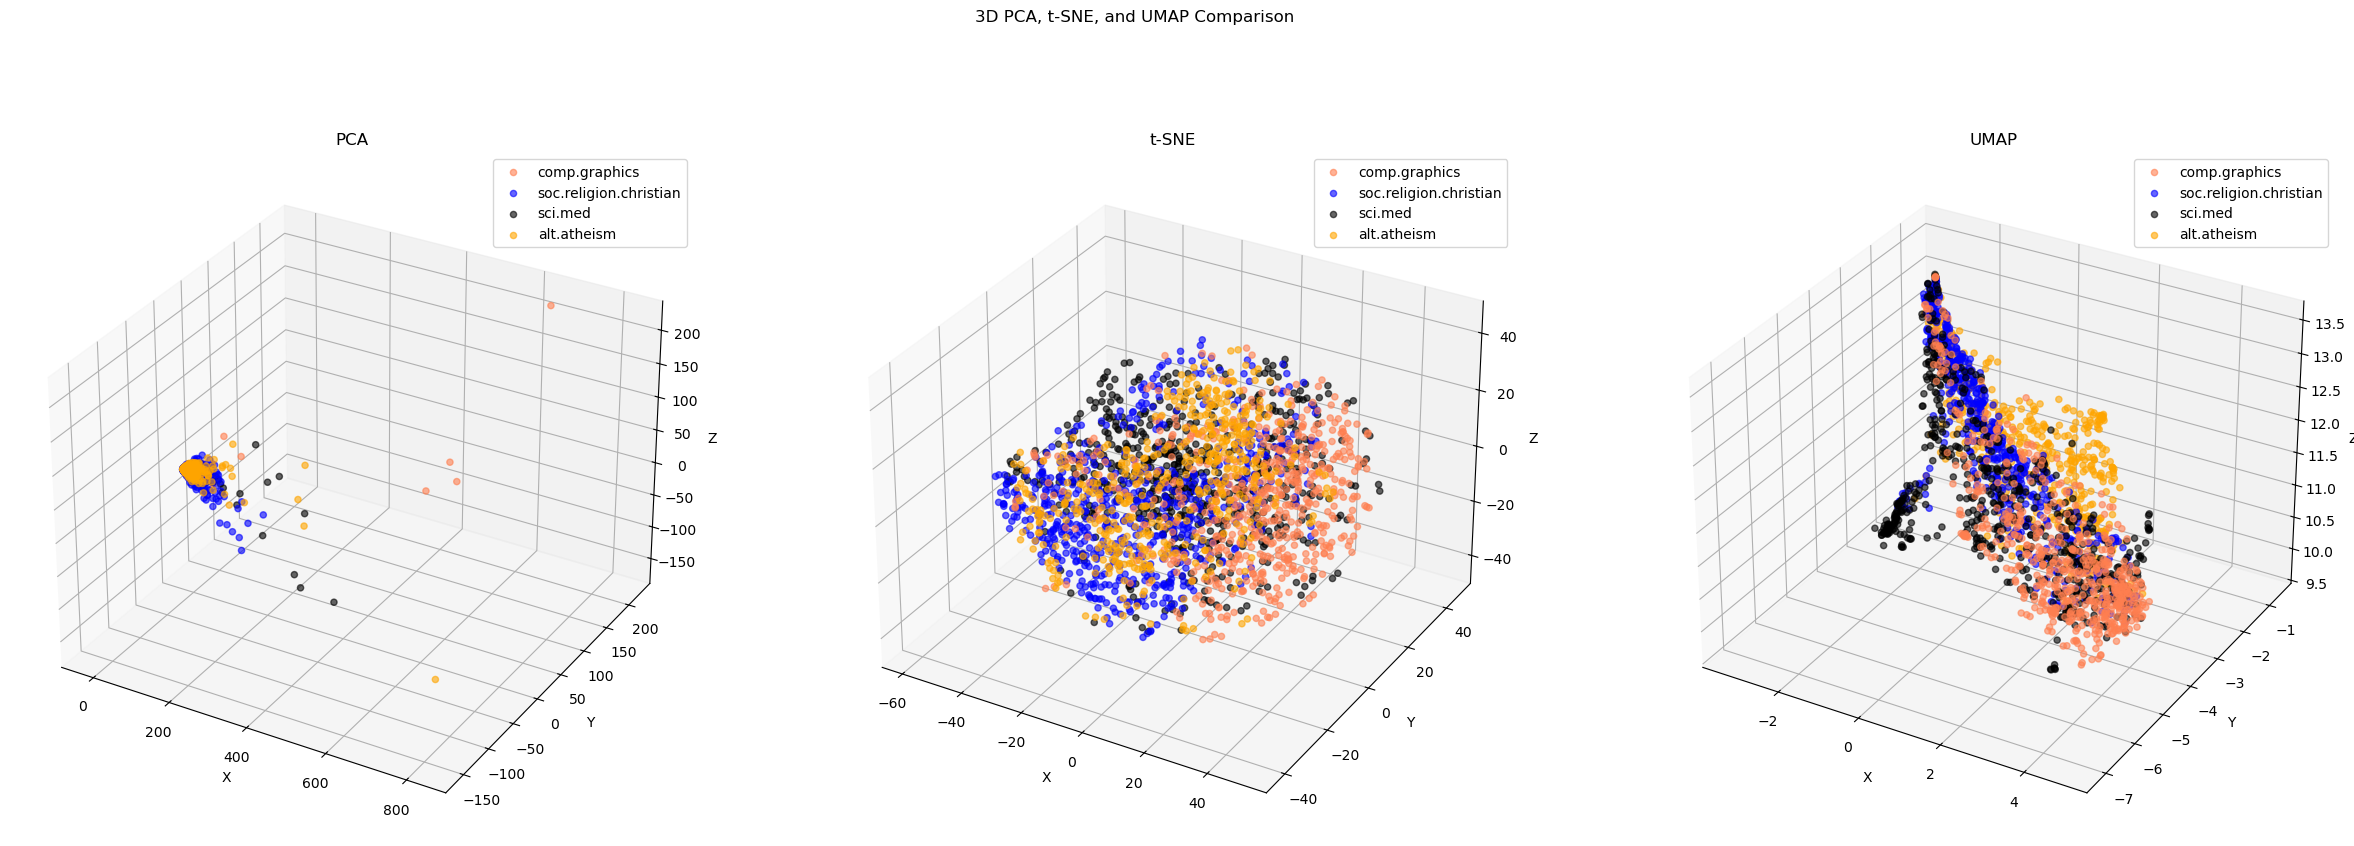

In [349]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
plt.close('all')
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

# Create 3 subplots for PCA, t-SNE, and UMAP in 3D
fig = plt.figure(figsize=(30, 10))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison')

# Define a function to create a 3D scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, alpha=0.6)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_scatter_3d(ax1, X_pca_tdm, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_scatter_3d(ax2, X_tsne_tdm, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_scatter_3d(ax3, X_umap_tdm, 'UMAP')

plt.show()


### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [360]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{London,, City, email, EC1V, response., do, sd...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","{For, Kentucky,, Sciences, If, domain,, The, b...","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{dreaded, (it's, email, entire, do, realize, W...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{anyone, at, 1989., Zwart), fill, Subject:, re...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{believe?, ""clothes, Which, The, heaven, you, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","{>Christians, medical, transfusion, otherwise,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","{immoral,, Joe., ourselves, numb, puts, Aaron'...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","{cause, do, appropriate, available, (408, used...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","{geb@cs.pitt.edu, (Gordon, what, Well,, Blinds...","[0, 0, 1, 0]","[0, 0, 1, 0]"


Yes, it works.

# **2&3 :**

In [444]:
!pip install huggingface_hub
!pip install datasets

In [410]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [412]:
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


-Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

-Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn guide .

-Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. Refer to this article.

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


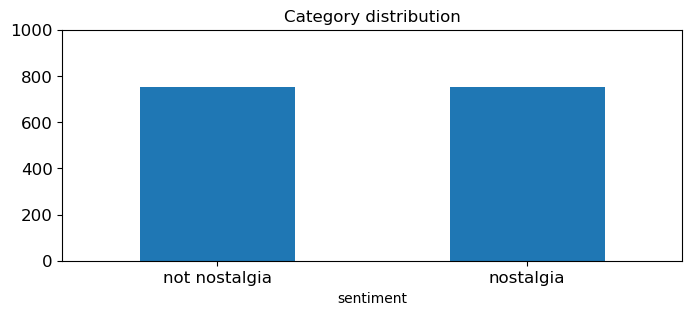

In [424]:
#First, print the distribution
print(df.sentiment.value_counts())

# plot barchart for X_sample
df.sentiment.value_counts().plot(kind = 'bar',
                                title = 'Category distribution',
                                ylim = [0, 1000], 
                                rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

#### **Word cloud for different sentiment**

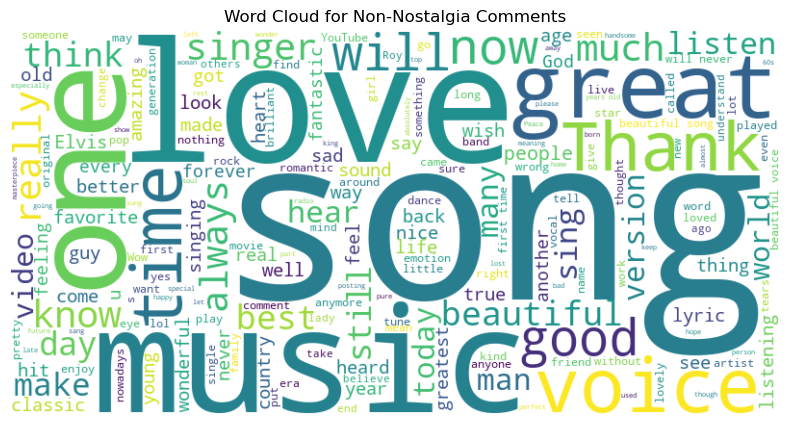

In [451]:
#Wordcloud
from datasets import load_dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# Filter for comments where sentiment is not nostalgia
non_nostalgia_comments = [comment for comment, sentiment in zip(ds['train']['comment'], ds['train']['sentiment']) if sentiment != "nostalgia"]

# Combine the filtered text data
text_data = " ".join(non_nostalgia_comments)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Not Nostalgia Comments")
plt.show()


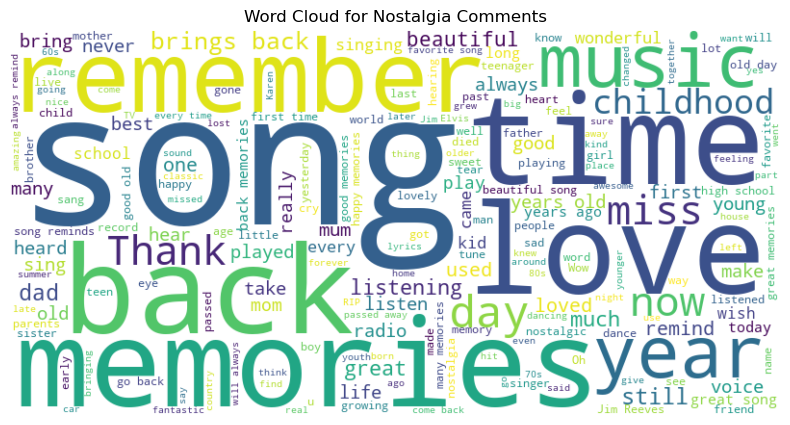

In [453]:
from datasets import load_dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# Filter for comments where sentiment is not nostalgia
nostalgia_comments = [comment for comment, sentiment in zip(ds['train']['comment'], ds['train']['sentiment']) if sentiment == "nostalgia"]

# Combine the filtered text data
text_data = " ".join(nostalgia_comments)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Nostalgia Comments")
plt.show()


#### **Generate TF-IDF Features**
Use Scikit-learn’s TfidfVectorizer to generate a TF-IDF matrix from the text data.

In [449]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer and transform the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'])

# Display the TF-IDF matrix as a DataFrame for visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df)


       10  100   11   12   13   14   15   16        17   18  ...  yes  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.150704  0.0  ...  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
1499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   

      yesterday  yet       you  young  younger      your  youth  youtube  yrs  
0           0.0  0.0  0.185671    0.0      

**Implement Naive Bayes Classifier**

1.using TF-IDF Features

2.using word frequency

In [459]:
#using TF-IDF Features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

# Initialize and train Multinomial Naive Bayes classifier
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_tfidf = nb_tfidf.predict(X_test)
print("TF-IDF Features - MultinomialNB Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


TF-IDF Features - MultinomialNB Classifier
Accuracy: 0.8633333333333333
               precision    recall  f1-score   support

    nostalgia       0.82      0.93      0.87       152
not nostalgia       0.92      0.79      0.85       148

     accuracy                           0.86       300
    macro avg       0.87      0.86      0.86       300
 weighted avg       0.87      0.86      0.86       300



In [461]:
#using word frequency
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

# Create word frequency (count) matrix
count_vectorizer = CountVectorizer(max_features=1000)  # Limit to 1000 features for simplicity
X_counts = count_vectorizer.fit_transform(df['comment'])

# Split data
X_train_counts, X_test_counts, y_train_counts, y_test_counts = train_test_split(X_counts, df['sentiment'], test_size=0.2, random_state=42)

# Initialize and train Bernoulli Naive Bayes classifier
nb_counts = BernoulliNB()
nb_counts.fit(X_train_counts, y_train_counts)

# Make predictions and evaluate
y_pred_counts = nb_counts.predict(X_test_counts)
print("Word Frequency Features - BernoulliNB Classifier")
print("Accuracy:", accuracy_score(y_test_counts, y_pred_counts))
print(classification_report(y_test_counts, y_pred_counts))


Word Frequency Features - BernoulliNB Classifier
Accuracy: 0.8866666666666667
               precision    recall  f1-score   support

    nostalgia       0.86      0.93      0.89       152
not nostalgia       0.93      0.84      0.88       148

     accuracy                           0.89       300
    macro avg       0.89      0.89      0.89       300
 weighted avg       0.89      0.89      0.89       300



**Compare Results and Comment on Differences**

1.Accuracy: The TF-IDF model perform better since it weighs words differently based on importance, reducing the impact of commonly occurring words.

2.TF-IDF Model: Tends to handle common words (stop words) better by giving them lower weights, possibly improving classification for text with heavy vocabulary overlap between classes. As for word frequency model, it relies solely on word counts, making it more susceptible to common words and potentially less effective for text distinctions

I think TF-IDF is better for capturing the importance of terms relative to the document and corpus, often resulting in more robust models for text classification. Word frequency is simpler but can be effective for datasets where individual word counts are informative.



# **4:**


**Remove Highly Specific or Rare Words** : The number of terms in top 5% for each category is too similiar. There is no meaning for that analysis. Also there are Rare words in each category, that is also not important.

**Handling Spelling Errors and Slang** : I think there will be and can be remove.(In the data prep part)

**Words including numbers or not a word**: There are some words that includes number in the text, which may be a meaning for it. Is we can't undersatnd it or have no information to understand it, I think it is okay to be delete.